# 문제 정의와 데이터셋 수집
> #### 내가 하고 싶은 주제를 정의해보자. 데이터는 EPL설립해인 1993-94시즌부터 2020-21시즌까지의 리그 결과이다. 내가 예측하고 싶은 것은 그동안의 전적을 가지고 이번 시즌 프리미어리그의 우승팀을 예측해보고싶다.
> #### 데이터셋은 캐글에있는 https://www.kaggle.com/irkaal/english-premier-league-results 데이터셋을 사용할 것이다.
-----------------------------
### Cloumns Description
| Column | Description |
|:---:|:---:|
|Season|Match Season|
|DateTime|Match Date and Time (yyyy-mm-dd hh:mm:ss)|
|FTHG|Full Time Home Team Goals|
|FTAG|Full Time Away Team Goals|
|FTR|Full Time Result (H=Home Win, D=Draw, A=Away Win)|
|HTHG|Half Time Home Team Goals|
|HTAG|Half Time Away Team Goals|
|HTR|Half Time Result (H=Home Win, D=Draw, A=Away Win)|
|Referee|Match Referee|
|HS|Home Team Shots|
|AS|Away Team Shots|
|HST|Home Team Shots on Target|
|AST|Away Team Shots on Target|
|HC|Home Team Corners|
|AC|Away Team Corners|
|HF|Home Team Fouls Committed|
|AF|Away Team Fouls Committed|
|HY|Home Team Yellow Cards|
|AY|Away Team Yellow Cards|
|HR|Home Team Red Cards|
|AR|Away Team Red Cards|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# 데이터 불러오기
df_result = pd.read_csv("/jupyter_proj/EPL-champion/data/results.csv", encoding='cp949')
df_result

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,2020-21,2021-05-23T16:00:00Z,Liverpool,Crystal Palace,2,0,H,1.0,0.0,H,...,5.0,4.0,14.0,1.0,10.0,8.0,2.0,2.0,0.0,0.0
10800,2020-21,2021-05-23T16:00:00Z,Man City,Everton,5,0,H,2.0,0.0,H,...,11.0,3.0,7.0,5.0,8.0,10.0,2.0,2.0,0.0,0.0
10801,2020-21,2021-05-23T16:00:00Z,Sheffield United,Burnley,1,0,H,1.0,0.0,H,...,3.0,3.0,8.0,9.0,11.0,1.0,3.0,1.0,0.0,0.0
10802,2020-21,2021-05-23T16:00:00Z,West Ham,Southampton,3,0,H,2.0,0.0,H,...,7.0,5.0,2.0,3.0,5.0,9.0,0.0,3.0,0.0,0.0


In [3]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10804 entries, 0 to 10803
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10804 non-null  object 
 1   DateTime  10804 non-null  object 
 2   HomeTeam  10804 non-null  object 
 3   AwayTeam  10804 non-null  object 
 4   FTHG      10804 non-null  int64  
 5   FTAG      10804 non-null  int64  
 6   FTR       10804 non-null  object 
 7   HTHG      9880 non-null   float64
 8   HTAG      9880 non-null   float64
 9   HTR       9880 non-null   object 
 10  Referee   7980 non-null   object 
 11  HS        7980 non-null   float64
 12  AS        7980 non-null   float64
 13  HST       7980 non-null   float64
 14  AST       7980 non-null   float64
 15  HC        7980 non-null   float64
 16  AC        7980 non-null   float64
 17  HF        7980 non-null   float64
 18  AF        7980 non-null   float64
 19  HY        7980 non-null   float64
 20  AY        7980 non-null   fl

In [4]:
df_result.isna().sum()

Season         0
DateTime       0
HomeTeam       0
AwayTeam       0
FTHG           0
FTAG           0
FTR            0
HTHG         924
HTAG         924
HTR          924
Referee     2824
HS          2824
AS          2824
HST         2824
AST         2824
HC          2824
AC          2824
HF          2824
AF          2824
HY          2824
AY          2824
HR          2824
AR          2824
dtype: int64

# 데이터 정리
- 필요없는 column들을 삭제하고, FTR column을 H = 0, D = 1, A = 2로 정의한다.

In [5]:
df_result.drop(['DateTime','HTHG','HTAG','HTR','Referee', 'HS', 'AS','HST','AST', 'HC', 'AC', 'HF','AF', 'HY', 'AY', 'HR', 'AR']
              , axis=1, inplace=True)
df_result

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1993-94,Arsenal,Coventry,0,3,A
1,1993-94,Aston Villa,QPR,4,1,H
2,1993-94,Chelsea,Blackburn,1,2,A
3,1993-94,Liverpool,Sheffield Weds,2,0,H
4,1993-94,Man City,Leeds,1,1,D
...,...,...,...,...,...,...
10799,2020-21,Liverpool,Crystal Palace,2,0,H
10800,2020-21,Man City,Everton,5,0,H
10801,2020-21,Sheffield United,Burnley,1,0,H
10802,2020-21,West Ham,Southampton,3,0,H


In [6]:
df_result.replace({'H' : 0, 'D' : 1, 'A' : 2}, inplace=True)
df_result

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1993-94,Arsenal,Coventry,0,3,2
1,1993-94,Aston Villa,QPR,4,1,0
2,1993-94,Chelsea,Blackburn,1,2,2
3,1993-94,Liverpool,Sheffield Weds,2,0,0
4,1993-94,Man City,Leeds,1,1,1
...,...,...,...,...,...,...
10799,2020-21,Liverpool,Crystal Palace,2,0,0
10800,2020-21,Man City,Everton,5,0,0
10801,2020-21,Sheffield United,Burnley,1,0,0
10802,2020-21,West Ham,Southampton,3,0,0


# 새로운 DataFrame만들기
- 각 팀의 득실점을 새로운 DataFrame으로 만들기
- Football club이 너무 많기 때문에 골득점이 500개 이하인 팀은 삭제

In [7]:
# column명 추출
team_name = list(df_result["HomeTeam"].unique())

# DataFrame 생성
df_team = pd.DataFrame(columns=team_name, index=["G", "D"])

# 골득실 df_team에 널기
for i in team_name:
    df_team[i].G = sum(df_result["FTHG"][df_result["HomeTeam"]== i])
    df_team[i].G += sum(df_result["FTAG"][df_result["AwayTeam"] == i])
    df_team[i].D = sum(df_result["FTAG"][df_result["HomeTeam"] == i])
    df_team[i].G += sum(df_result["FTHG"][df_result["AwayTeam"] == i])
    
df_team

,Arsenal,Aston Villa,Chelsea,Liverpool,Man City,Newcastle,Oldham,Sheffield United,Southampton,West Ham,...,Reading,Hull,Stoke,Burnley,Blackpool,Swansea,Cardiff,Bournemouth,Brighton,Huddersfield
G,2526,1883,2443,2500,2076,2124,77,264,1638,1944,...,244,359,710,498,96,519,136,423,260,128
D,452,532,441,431,418,564,33,86,497,609,...,78,145,213,170,37,170,73,148,102,56


In [8]:
# 골득점이 1000골 이상이 안되는 팀은 삭제
for i in team_name:
    team_G = df_team[i].loc['G'] < 1000
    if team_G:
        df_team.drop([i], axis=1, inplace=True)

df_team

,Arsenal,Aston Villa,Chelsea,Liverpool,Man City,Newcastle,Southampton,West Ham,Tottenham,Everton,Blackburn,Man United,Leicester,Bolton,Sunderland,Fulham
G,2526,1883,2443,2500,2076,2124,1638,1944,2374,2167,1357,2647,1201,1007,1145,1099
D,452,532,441,431,418,564,497,609,574,588,363,392,366,313,371,363


In [9]:
# 그래프를 그리그 위해 전치행렬로 바꾸기
df_team = df_team.T

In [10]:
df_team

,G,D
Arsenal,2526,452
Aston Villa,1883,532
Chelsea,2443,441
Liverpool,2500,431
Man City,2076,418
Newcastle,2124,564
Southampton,1638,497
West Ham,1944,609
Tottenham,2374,574
Everton,2167,588


In [11]:
# 인덱스를 정수로 바꾸기
df_team = df_team.reset_index()
df_team.rename(columns = {'index' : 'team'}, inplace = True)
df_team_G = df_team.sort_values("G", ascending=False)

Text(0.5, 0, 'Difference')

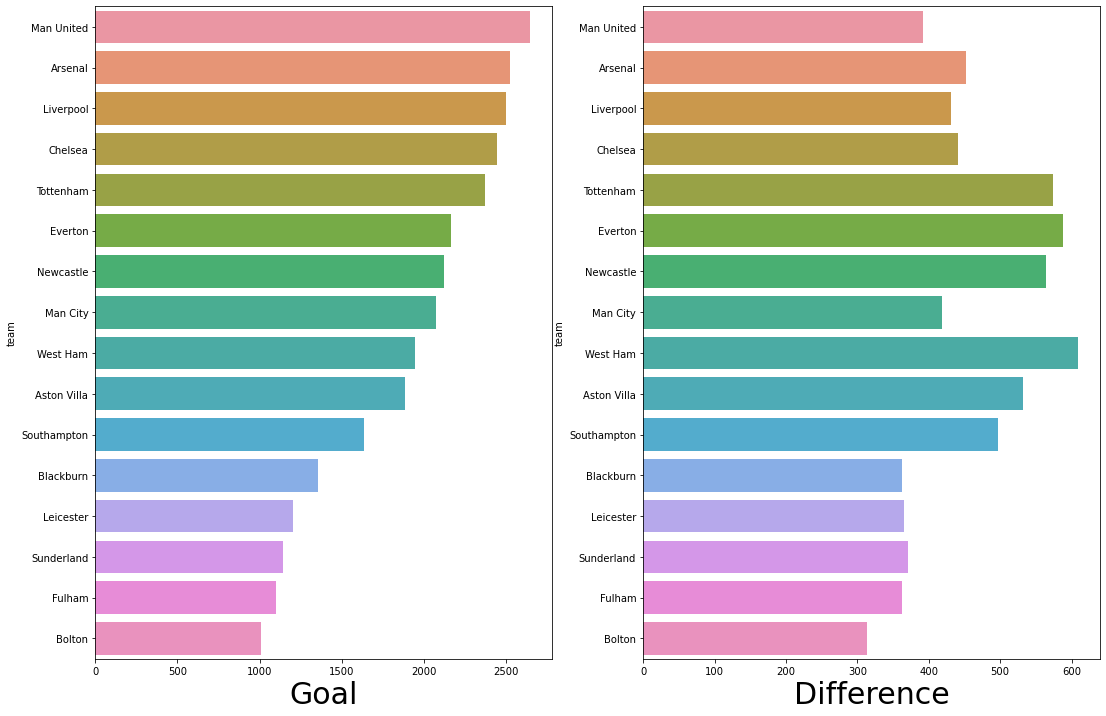

In [12]:
# 골득실 그래프
figure, (ax1,ax2) = plt.subplots(nrows = 1, ncols =2 ) 
figure.set_size_inches(18,12)
sns.barplot(data=df_team_G, x="G", y="team", ax=ax1)
sns.barplot(data=df_team_G, x="D", y="team", ax=ax2)
ax1.set_xlabel("Goal", fontsize=30)
ax2.set_xlabel("Difference", fontsize=30)

In [13]:
# 승률 그래프 (승리 경기 수) / (전체 경기 수)
cnt = 0

# 새로운 column인 win rate 생성
df_team.insert(3, "Winrate", 0)

# 경기 날짜는 2000년대 이후로 바꾼다.
i = 0
for i in range(0, 10802):
    season = (df_result["Season"].loc[i]).split("-")
    mm = int(season[0])
    if mm < 2000:
        df_result.drop(i, inplace=True)

for name in team_name:
    All_match = sum(df_result["HomeTeam"]==name) + sum(df_result["AwayTeam"]==name)
    Win_match = sum((df_result["HomeTeam"]==name) & (df_result["FTR"]==0))
    Win_match += sum((df_result["AwayTeam"]==name) & (df_result["FTR"]==2))
    if All_match == 0:
        continue
    df_team["Winrate"].loc[cnt] = round((Win_match/All_match) * 100, 1)
    cnt+=1
    
df_team

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,team,G,D,Winrate
0,Arsenal,2526,452,56.1
1,Aston Villa,1883,532,31.0
2,Chelsea,2443,441,59.0
3,Liverpool,2500,431,54.6
4,Man City,2076,418,52.5
5,Newcastle,2124,564,34.2
6,Southampton,1638,497,27.2
7,West Ham,1944,609,32.3
8,Tottenham,2374,574,32.5
9,Everton,2167,588,22.4


Text(0.5, 0, 'Win rate')

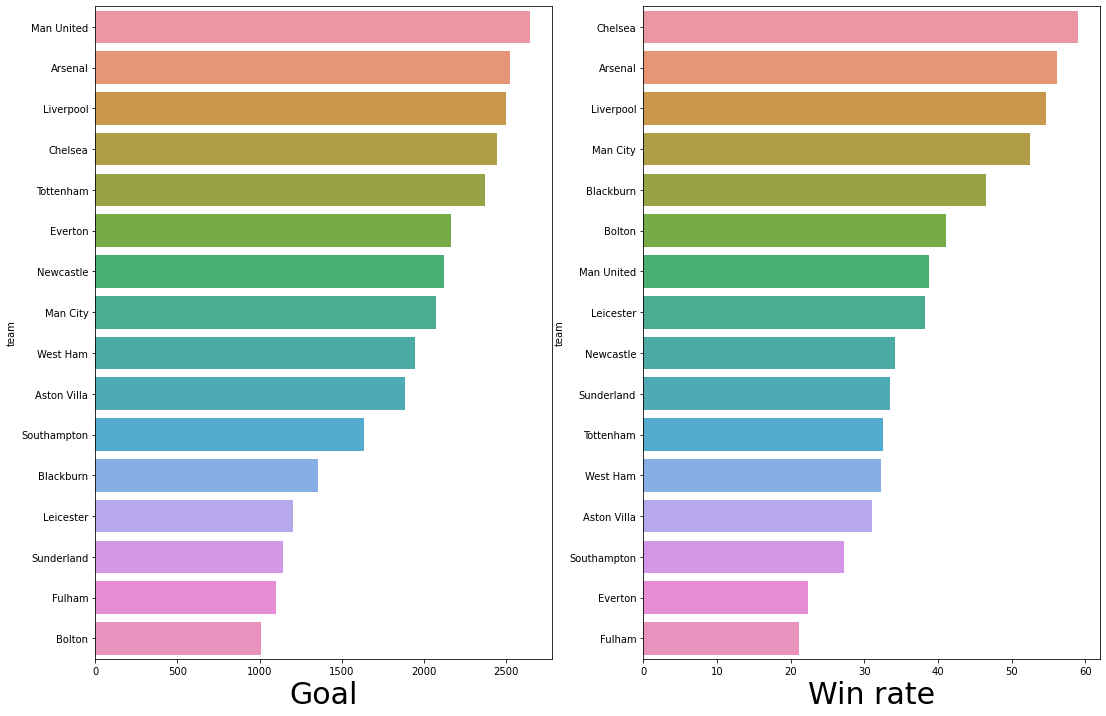

In [14]:
# 승률 그래프

figure, (ax1,ax2) = plt.subplots(nrows = 1, ncols =2 ) 
figure.set_size_inches(18,12)
sns.barplot(data=df_team_G, x="G", y="team", ax=ax1)
sns.barplot(data=df_team.sort_values("Winrate", ascending=False), x="Winrate", y="team", ax=ax2)
ax1.set_xlabel("Goal", fontsize=30)
ax2.set_xlabel("Win rate", fontsize=30)

# KNN 알고리즘을 통한 경기 예측

In [15]:
df_result.drop(["Season", "FTHG", "FTAG"], axis=1, inplace=True)

In [16]:
df_result

,HomeTeam,AwayTeam,FTR
2824,Charlton,Man City,0
2825,Chelsea,West Ham,0
2826,Coventry,Middlesbrough,2
2827,Derby,Southampton,1
2828,Leeds,Everton,0
...,...,...,...
10799,Liverpool,Crystal Palace,0
10800,Man City,Everton,0
10801,Sheffield United,Burnley,0
10802,West Ham,Southampton,0


In [17]:
df_en_result = pd.get_dummies(df_result, columns=["HomeTeam", "AwayTeam"])

In [18]:
df_en_result

,FTR,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Birmingham,HomeTeam_Blackburn,HomeTeam_Blackpool,HomeTeam_Bolton,HomeTeam_Bournemouth,HomeTeam_Bradford,HomeTeam_Brighton,...,AwayTeam_Southampton,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves
2824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2826,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2827,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10802,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [19]:
df_en_result.columns

Index(['FTR', 'HomeTeam_Arsenal', 'HomeTeam_Aston Villa',
       'HomeTeam_Birmingham', 'HomeTeam_Blackburn', 'HomeTeam_Blackpool',
       'HomeTeam_Bolton', 'HomeTeam_Bournemouth', 'HomeTeam_Bradford',
       'HomeTeam_Brighton', 'HomeTeam_Burnley', 'HomeTeam_Cardiff',
       'HomeTeam_Charlton', 'HomeTeam_Chelsea', 'HomeTeam_Coventry',
       'HomeTeam_Crystal Palace', 'HomeTeam_Derby', 'HomeTeam_Everton',
       'HomeTeam_Fulham', 'HomeTeam_Huddersfield', 'HomeTeam_Hull',
       'HomeTeam_Ipswich', 'HomeTeam_Leeds', 'HomeTeam_Leicester',
       'HomeTeam_Liverpool', 'HomeTeam_Man City', 'HomeTeam_Man United',
       'HomeTeam_Middlesbrough', 'HomeTeam_Newcastle', 'HomeTeam_Norwich',
       'HomeTeam_Portsmouth', 'HomeTeam_QPR', 'HomeTeam_Reading',
       'HomeTeam_Sheffield United', 'HomeTeam_Southampton', 'HomeTeam_Stoke',
       'HomeTeam_Sunderland', 'HomeTeam_Swansea', 'HomeTeam_Tottenham',
       'HomeTeam_Watford', 'HomeTeam_West Brom', 'HomeTeam_West Ham',
       'HomeTeam_Wi

In [20]:
df_en_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7980 entries, 2824 to 10803
Data columns (total 87 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   FTR                        7980 non-null   int64
 1   HomeTeam_Arsenal           7980 non-null   uint8
 2   HomeTeam_Aston Villa       7980 non-null   uint8
 3   HomeTeam_Birmingham        7980 non-null   uint8
 4   HomeTeam_Blackburn         7980 non-null   uint8
 5   HomeTeam_Blackpool         7980 non-null   uint8
 6   HomeTeam_Bolton            7980 non-null   uint8
 7   HomeTeam_Bournemouth       7980 non-null   uint8
 8   HomeTeam_Bradford          7980 non-null   uint8
 9   HomeTeam_Brighton          7980 non-null   uint8
 10  HomeTeam_Burnley           7980 non-null   uint8
 11  HomeTeam_Cardiff           7980 non-null   uint8
 12  HomeTeam_Charlton          7980 non-null   uint8
 13  HomeTeam_Chelsea           7980 non-null   uint8
 14  HomeTeam_Coventry   

In [21]:
# Preprocessing
y = df_en_result.iloc[:, 2].values
del df_en_result["FTR"]
X = df_en_result.values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9968671679197995

In [26]:
print(classifier.score(X_test, y_test))

0.9968671679197995
